### Read in Dataset

In [1]:
#Libraries
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [2]:
corpus = pd.read_csv('Spotify_reviews.csv')

In [3]:
# Preview
corpus.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


## Tagging Reviews
Creating a fucntion to tag the reivew as "Positive", "Negative", or "Neutral"

I will assume a positive reviewer has also left an app rating that is postive. The critia is as follows:


Positive = rating: 4-5

Neutral = rating: 3

Negative = rating: 1-2

### Creating a function to make a new column (Sentiment) to catagorize the reviews

In [4]:
#create a function to compute the negative, neutral and positive analysis
def getAnalysis(Rating):
    if Rating<3:
        return 'negative'
    elif Rating==3:
        return 'neutral'
    else:
        return 'positive'
    
corpus['Sentiment']=corpus['Rating'].apply(getAnalysis)

#show preview
corpus.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply,Sentiment
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN,positive
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN,positive
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN,positive
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN,negative
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN,negative


## Pulling Key Findings From Results

Using NLP, we will determine frequently occuring words and phrases for positive reviews. Bi-grams (2 words) will be used.

### Dispalying the Data

In [5]:
#using the same function as above to tag the dataset with sentiment tags
def getAnalysis(Rating):
    if Rating<3:
        return 'negative'
    elif Rating==3:
        return 'neutral'
    else:
        return 'positive'
    
corpus['Sentiment']=corpus['Rating'].apply(getAnalysis)

#show preview
corpus.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply,Sentiment
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN,positive
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN,positive
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN,positive
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN,negative
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN,negative


### Postive Reviews

Pulling out only the postively tagged sentiment reviews

In [6]:
#extracting rows where the setiment is "positive"
positive_sentiment = corpus.loc[corpus['Sentiment'] == "positive"]
positive_sentiment.head()   

,Time_submitted,Review,Rating,Total_thumbsup,Reply,Sentiment
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN,positive
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN,positive
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN,positive
6,2022-07-09 13:19:21,I love the selection and the lyrics are provid...,5,0,NaN,positive
8,2022-07-09 13:16:49,It's a great app and the best mp3 music app I ...,5,0,NaN,positive


In [7]:
#stop words
sw = stopwords.words('english')

def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

### Cleaning the data

In [13]:
#removing stop words, punctuation, and capitalization
def doc_preparer(doc, stop_words=sw):
    '''
    
    :param doc: a document from the satire corpus 
    :return: a document string with words which have been 
            lemmatized, 
            parsed for stopwords, 
            made lowercase,
            and stripped of punctuation and numbers.
    '''
    
    regex_token = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
    doc = regex_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in sw]
    # print(doc)
    doc = pos_tag(doc)
    doc = [(word[0], get_wordnet_pos(word[1])) for word in doc]
    lemmatizer = WordNetLemmatizer() 
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    return ' '.join(doc)

In [9]:
import nltk
nltk.download('averaged_perceptron_tagger')

token_docs = [doc_preparer(doc, sw) for doc in positive_sentiment["Review"]]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hopmiller\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [14]:
# renaming the cleaned data
clean_pos_sent= token_docs

### Top 50 most frequently occuring paired words (bi-gram- 2 words)

            Bi-gram  Frequency
0         music app       2021
1        best music       1608
2      listen music       1557
3          love app       1501
4      love spotify       1391
5         great app       1318
6          good app       1115
7          easy use       1099
8          best app        867
9       use spotify        719
10       app listen        683
11      great music        680
12        app music        668
13         app ever        590
14       good music        565
15      listen song        527
16      really good        526
17        play song        512
18          use app        487
19        song want        437
20       every song        426
21       love music        403
22    song playlist        401
23     music stream        398
24          app use        393
25  spotify premium        385
26        give star        374
27        song like        371
28         app good        363
29       play music        363
30        song play        361
31      

[Text(0, 0, 'music app'),
 Text(1, 0, 'best music'),
 Text(2, 0, 'listen music'),
 Text(3, 0, 'love app'),
 Text(4, 0, 'love spotify'),
 Text(5, 0, 'great app'),
 Text(6, 0, 'good app'),
 Text(7, 0, 'easy use'),
 Text(8, 0, 'best app'),
 Text(9, 0, 'use spotify'),
 Text(10, 0, 'app listen'),
 Text(11, 0, 'great music'),
 Text(12, 0, 'app music'),
 Text(13, 0, 'app ever'),
 Text(14, 0, 'good music'),
 Text(15, 0, 'listen song'),
 Text(16, 0, 'really good'),
 Text(17, 0, 'play song'),
 Text(18, 0, 'use app'),
 Text(19, 0, 'song want'),
 Text(20, 0, 'every song'),
 Text(21, 0, 'love music'),
 Text(22, 0, 'song playlist'),
 Text(23, 0, 'music stream'),
 Text(24, 0, 'app use'),
 Text(25, 0, 'spotify premium'),
 Text(26, 0, 'give star'),
 Text(27, 0, 'song like'),
 Text(28, 0, 'app good'),
 Text(29, 0, 'play music'),
 Text(30, 0, 'song play'),
 Text(31, 0, 'want listen'),
 Text(32, 0, 'music podcast'),
 Text(33, 0, 'spotify best'),
 Text(34, 0, 'make playlist'),
 Text(35, 0, 'please fix'),
 

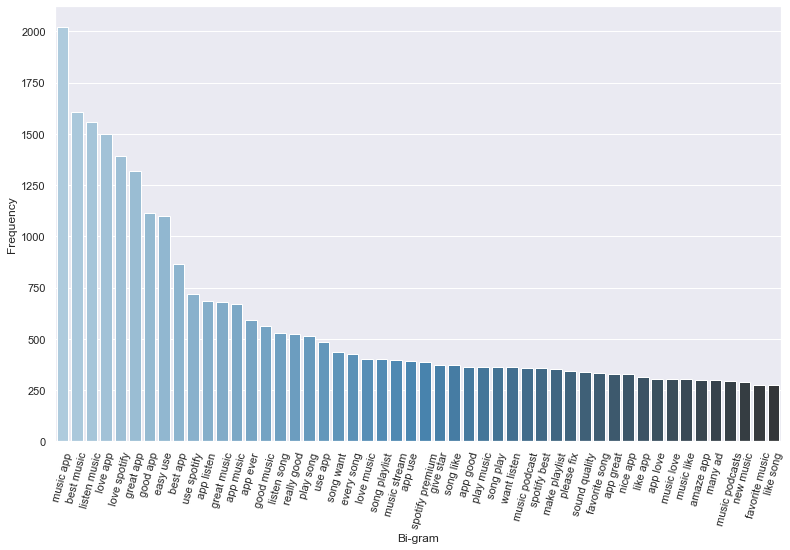

In [24]:
# Most frequently occuring bigrams
def get_top_n2_words(clean_pos_sent, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(clean_pos_sent)
    bag_of_words = vec1.transform(clean_pos_sent)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

# Convert most freq bigrams to dataframe for plotting bar plot, save as CSV
top2_words = get_top_n2_words(clean_pos_sent, n=50)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Frequency"]
print(top2_df)


# Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Frequency", data=top2_df, palette="Blues_d")
h.set_xticklabels(h.get_xticklabels(), rotation=75)


## Results
Many reviews dicuss loving the app overall. Specifically the song selection, spotify premium, and podcasts. Most reviewers highlighted the phrase "music app". Spotify might want to consider highlighting their other features more in the future. 